In [153]:
!pip install numpy pandas 
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install pandas
!pip show pandas




ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


Name: pandas
Version: 2.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [155]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',
              style='white',
              palette='deep',
              font='Lucida Calligraphy',
              font_scale=1.5,
              color_codes=True,
              rc=None)

import matplotlib

plt.rcParams['figure.figsize'] = (14,8) 
plt.rcParams['figure.facecolor'] = '#F0F8FF'
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['figure.dpi'] = 50
plt.rcParams['figure.edgecolor'] = 'green'
plt.rcParams['figure.frameon'] = True

plt.rcParams["figure.autolayout"] = True

plt.rcParams['axes.facecolor'] = '#F5F5DC'
plt.rcParams['axes.titlesize'] = 25   
plt.rcParams["axes.titleweight"] = 'normal'
plt.rcParams["axes.titlecolor"] = 'Olive'
plt.rcParams['axes.edgecolor'] = 'pink'

plt.rcParams["axes.linewidth"] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.titlelocation'] = 'center' 
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelpad"] = 2
plt.rcParams['axes.labelweight'] = 1
plt.rcParams["axes.labelcolor"] = 'Olive'
plt.rcParams["axes.axisbelow"] = False 
plt.rcParams['axes.xmargin'] = .2
plt.rcParams["axes.ymargin"] = .2

plt.rcParams["xtick.bottom"] = True 
plt.rcParams['xtick.color'] = '#A52A2A'
plt.rcParams["ytick.left"] = True  
plt.rcParams['ytick.color'] = '#A52A2A'

plt.rcParams['axes.grid'] = True 
plt.rcParams['grid.color'] = 'green'
plt.rcParams['grid.linestyle'] = '--' 
plt.rcParams['grid.linewidth'] = .5
plt.rcParams['grid.alpha'] = .3       

plt.rcParams['legend.loc'] = 'best' 
plt.rcParams['legend.facecolor'] =  'NavajoWhite'  
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20


plt.rcParams['font.family'] = 'Lucida Calligraphy'
plt.rcParams['font.size'] = 14

plt.rcParams['figure.dpi'] = 50
plt.rcParams['figure.edgecolor'] = 'Blue'

In [156]:
pd.set_option('display.max_columns',None)

In [157]:
# Transformer  
tf = pd.read_csv('./archive/Overview.csv')
display(tf.shape) 
tf.head()

(20316, 8)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25T13:09,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27T10:49,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27T10:51,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27T10:52,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [158]:
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], errors='coerce')
tf.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25 13:09:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [159]:
cv = pd.read_csv('./archive/CurrentVoltage.csv')
display(cv.shape)
cv.head()

(19352, 11)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'], errors='coerce')
cv.head()


,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
transformer = pd.merge(tf, cv, on='DeviceTimeStamp')
transformer.sample(5)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
5478,2019-08-19 06:15:00,31.0,0.0,27.0,41.0,0.0,0.0,0.0,239.5,238.8,239.9,40.3,38.1,59.3,412.8,413.3,415.4,20.1
4140,2019-08-04 15:00:00,43.0,0.0,37.0,39.0,0.0,0.0,1.0,230.0,229.1,230.6,110.2,103.7,124.2,399.0,399.8,402.5,17.8
18373,2020-03-06 16:30:00,32.0,1.0,30.0,100.0,0.0,0.0,0.0,245.4,245.2,244.3,105.4,66.1,103.4,424.8,423.2,425.1,39.4
8461,2019-09-30 19:00:00,27.0,0.0,26.0,53.0,0.0,0.0,0.0,223.3,227.0,224.0,161.6,142.7,155.5,390.8,391.3,386.3,16.2
20442,2020-04-13 19:00:00,34.0,1.0,32.0,100.0,0.0,0.0,0.0,242.3,240.7,240.0,75.6,39.4,98.2,419.0,414.9,419.0,51.1


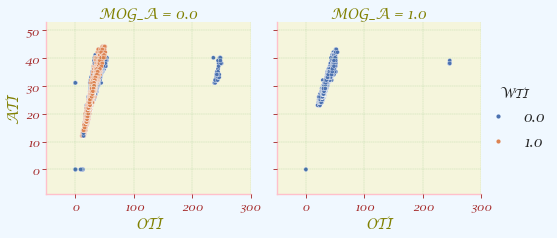

In [162]:
sns.relplot(data=tf, x="OTI", y="ATI", hue="WTI",col="MOG_A");

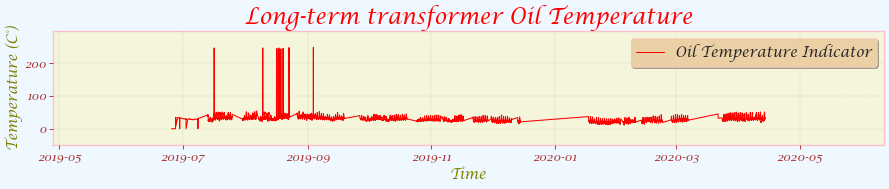

In [163]:
# Oil Temperature
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.OTI, label="Oil Temperature Indicator",color='red')
plt.title("Long-term transformer Oil Temperature",fontsize = 30,color='Red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (C°)")
plt.show() 

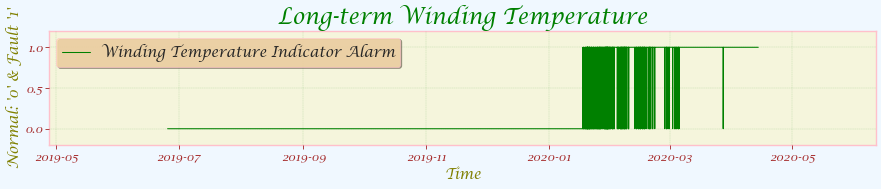

In [164]:
# Winding Temperature Indicator Alarm
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.WTI, label="Winding Temperature Indicator Alarm",color='green')
plt.title("Long-term Winding Temperature",fontsize = 30,color='Green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

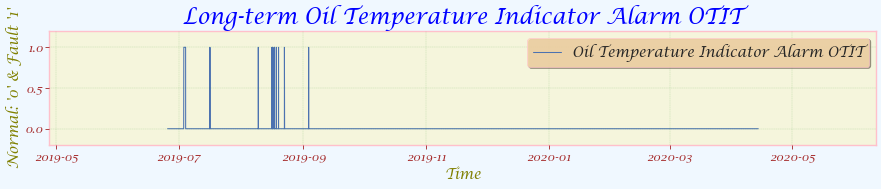

In [165]:
# Oil Temperature Indicator Alarm OTIT

plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_A, label="Oil Temperature Indicator Alarm OTIT")
plt.title("Long-term Oil Temperature Indicator Alarm OTIT",fontsize = 30,color='Blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

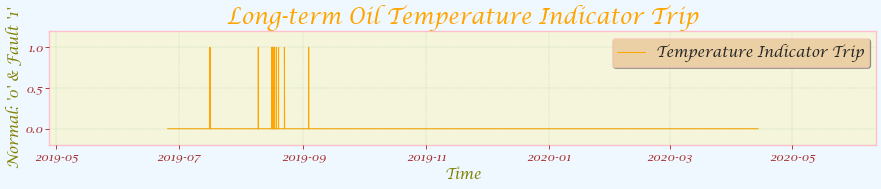

In [166]:
plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_T, label="Temperature Indicator Trip",color='Orange')
plt.title("Long-term Oil Temperature Indicator Trip",fontsize = 30,color='Orange')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

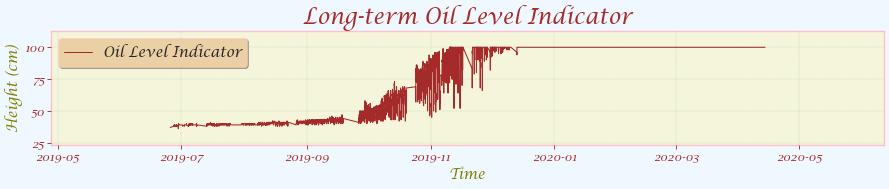

In [167]:
plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OLI, label="Oil Level Indicator",color='Brown')
plt.title("Long-term Oil Level Indicator",fontsize = 30,color='Brown')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show() 

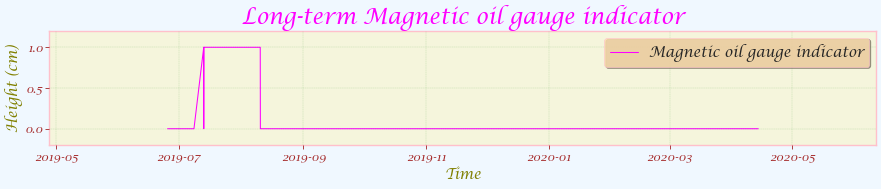

In [168]:
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.MOG_A, label="Magnetic oil gauge indicator",color='Magenta')
plt.title("Long-term Magnetic oil gauge indicator",fontsize = 30,color='Magenta')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show() 


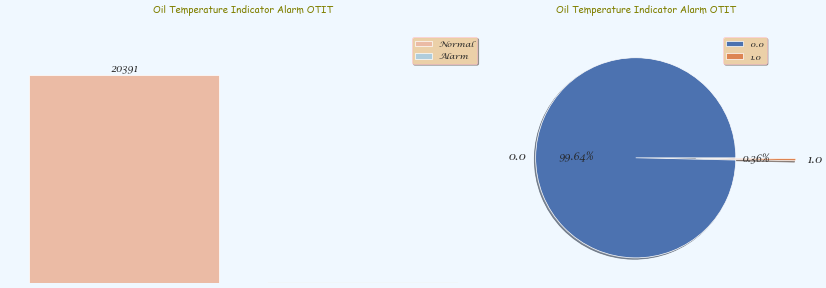

In [169]:
plt.rcParams['legend.fontsize'] = 12
plt.rcParams["axes.labelsize"] = 20

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_A', data=transformer, palette='RdBu')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Alarm OTIT", fontsize=20,color='Olive',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_A'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Alarm OTIT", fontsize = 20,color='Olive',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off');


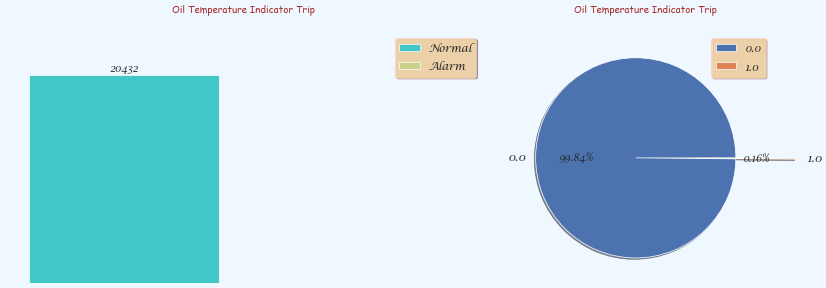

In [170]:
plt.rcParams['legend.fontsize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelcolor"] = 'brown'

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_T', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Trip", fontsize=30,color='Brown',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_T'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Trip", fontsize = 30,color='Brown',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off');

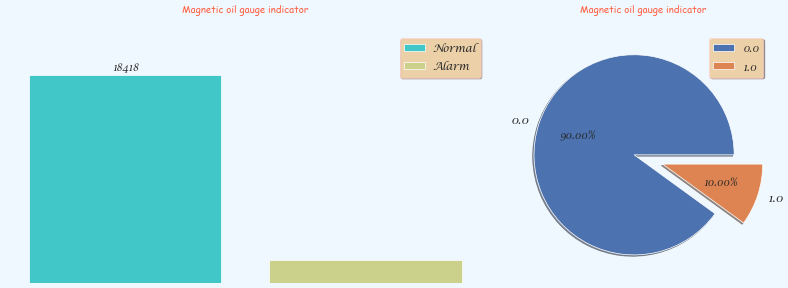

In [171]:
plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='MOG_A', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Magnetic oil gauge indicator", fontsize=30,color='Tomato',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['MOG_A'].value_counts().plot.pie(explode=[0.1, 0.2],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Magnetic oil gauge indicator", fontsize = 30,color='Tomato',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off');

In [172]:
X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1)
y = transformer['MOG_A']

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)


In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.83 %
--------------------------------------------------------
Classification_Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3684
         1.0       0.94      0.94      0.94       409

    accuracy                           0.99      4093
   macro avg       0.97      0.97      0.97      4093
weighted avg       0.99      0.99      0.99      4093

--------------------------------------------------------


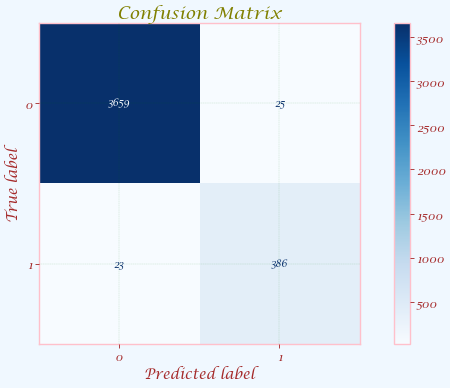

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Huấn luyện mô hình
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Dự đoán
y_pred_rf = random_forest.predict(X_test)

# Đánh giá
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100, 2)

# In kết quả
print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report:\n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


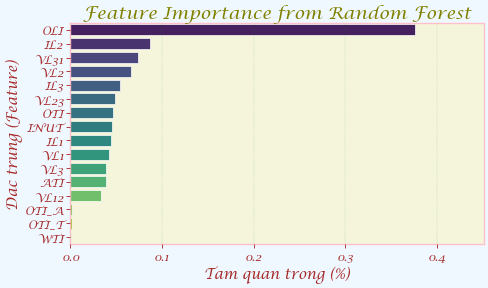

In [176]:
# Giả sử bạn vẫn còn giữ X gốc trước khi chuẩn hóa
feature_names = X.columns  # Lưu tên các đặc trưng trước khi chuẩn hóa

# Lấy tầm quan trọng từ mô hình Random Forest
importances = random_forest.feature_importances_

# Tạo DataFrame sắp xếp tầm quan trọng
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ thanh
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Tam quan trong (%)')
plt.ylabel('Dac trung (Feature)')
plt.tight_layout()
plt.show()


In [177]:
# Nếu chưa có y_pred_rf
y_pred_rf = random_forest.predict(X_test)

# Lấy 40 điểm dự đoán gần nhất
time_index = transformer['DeviceTimeStamp'].iloc[-100:].reset_index(drop=True)
df_result = pd.DataFrame({'Prediction': y_pred_rf[-100:]}, index=time_index)

print("Giá trị DataFrame:\n", df_result)


Giá trị DataFrame:
                      Prediction
DeviceTimeStamp                
2020-04-13 00:44:00         0.0
2020-04-13 00:44:00         0.0
2020-04-13 01:00:00         0.0
2020-04-13 01:15:00         0.0
2020-04-13 01:30:00         0.0
...                         ...
2020-04-13 23:30:00         0.0
2020-04-13 23:45:00         0.0
2020-04-14 00:00:00         1.0
2020-04-14 00:15:00         0.0
2020-04-14 00:30:00         0.0

[100 rows x 1 columns]


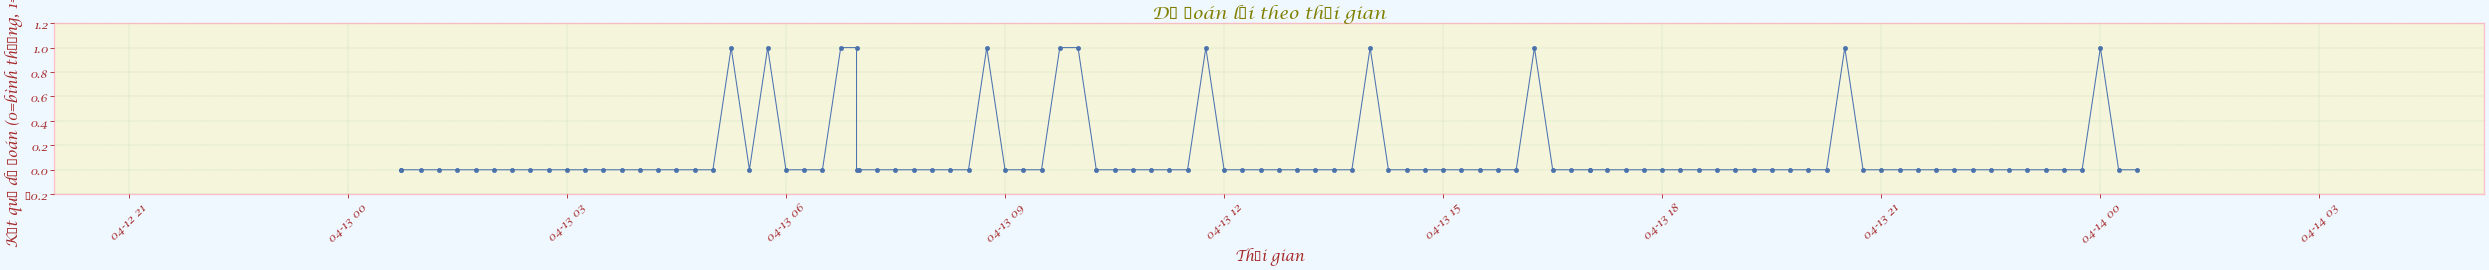

In [178]:
# Vẽ biểu đồ đường
plt.figure(figsize=(50, 5))
plt.plot(df_result.index, df_result['Prediction'], marker='o', linestyle='-')
plt.title('Dự đoán lỗi theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Kết quả dự đoán (0=bình thường, 1=lỗi)')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [179]:

import pandas as pd

transformer = pd.read_csv("./archive/Overview.csv")
transformer['DeviceTimeStamp'] = pd.to_datetime(transformer['DeviceTimeStamp'])
transformer = transformer.sort_values('DeviceTimeStamp').reset_index(drop=True)


In [180]:
transformer['TimeToEvent'] = None
counter = None
for i in reversed(range(len(transformer))):
    if transformer.loc[i, 'MOG_A'] == 1:
        counter = 0
        transformer.loc[i, 'TimeToEvent'] = counter
    elif counter is not None:
        counter += 1
        transformer.loc[i, 'TimeToEvent'] = counter

# Tính thời gian còn lại theo giờ
transformer = transformer.dropna(subset=['TimeToEvent'])
transformer['TimeToEvent'] = transformer['TimeToEvent'].astype(int)
interval = transformer['DeviceTimeStamp'].diff().dropna().mean().total_seconds() / 60
transformer['TimeToEvent_minutes'] = transformer['TimeToEvent'] * interval
transformer['TimeToEvent_hours'] = transformer['TimeToEvent_minutes'] / 60


In [181]:
sensor_features = ['OTI', 'WTI', 'ATI', 'OLI', 'OTI_A', 'OTI_T']
data = transformer[sensor_features + ['TimeToEvent_hours']].dropna().reset_index(drop=True)


In [182]:
import numpy as np
import pandas as pd

# Bước này giả định bạn đã có biến `transformer` đã xử lý xong ở bước 1
# Nếu chưa, hãy chạy lại bước 1 trước (đọc dữ liệu + tạo TimeToEvent_hours)

# Chọn các đặc trưng để huấn luyện LSTM
sensor_features = ['OTI', 'WTI', 'ATI', 'OLI', 'OTI_A', 'OTI_T']
data = transformer[sensor_features + ['TimeToEvent_hours']].dropna().reset_index(drop=True)

# Định nghĩa hàm tạo sliding window cho LSTM
def create_sliding_window_dataset(data, look_back=5):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data.iloc[i:i+look_back, :-1].values)   # lấy các đặc trưng
        y.append(data.iloc[i + look_back, -1])           # lấy nhãn TimeToEvent tại thời điểm tiếp theo
    return np.array(X), np.array(y)

# Áp dụng với look_back = 5
look_back = 5
X_lstm, y_lstm = create_sliding_window_dataset(data, look_back=look_back)

# Kiểm tra kết quả
print("✅ X_lstm shape:", X_lstm.shape)  # (samples, timesteps=5, features=6)
print("✅ y_lstm shape:", y_lstm.shape)  # (samples,)


✅ X_lstm shape: (3989, 5, 6)
✅ y_lstm shape: (3989,)


In [183]:
from sklearn.model_selection import train_test_split

# Chuyển dữ liệu 3D thành 2D: (samples, timesteps × features)
X_rf = X_lstm.reshape(X_lstm.shape[0], -1)

# Chia train/test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_lstm, test_size=0.2, shuffle=False
)


In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Khởi tạo và huấn luyện mô hình
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Dự đoán
y_pred_rf = rf_model.predict(X_test_rf)

# Đánh giá
mae = mean_absolute_error(y_test_rf, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae:.2f} giờ")


Mean Absolute Error (MAE): 0.52 giờ


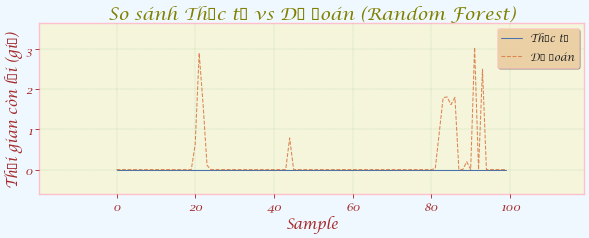

In [185]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test_rf[:100], label='Thực tế')
plt.plot(y_pred_rf[:100], label='Dự đoán', linestyle='--')
plt.title('So sánh Thực tế vs Dự đoán (Random Forest)')
plt.xlabel('Sample')
plt.ylabel('Thời gian còn lại (giờ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [186]:
# Tách tập kiểm thử từ đúng khoảng bạn yêu cầu
test_df = merged_df[
    (merged_df['DeviceTimeStamp'] >= '2019-07-10T00:01') &
    (merged_df['DeviceTimeStamp'] <= '2019-07-13T13:00')
].dropna(subset=['MOG_A'])

# Tập huấn luyện là toàn bộ phần còn lại
train_df = merged_df[~merged_df.index.isin(test_df.index)].dropna(subset=['MOG_A'])


In [187]:
# Các cột đầu vào
feature_cols = [col for col in merged_df.columns if col not in ['DeviceTimeStamp', 'MOG_A']]

# Huấn luyện
X_train_raw = train_df[feature_cols].values
y_train = train_df['MOG_A'].values

# Kiểm thử
X_test_raw = test_df[feature_cols].values
y_test = test_df['MOG_A'].values


In [188]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)


In [189]:
import numpy as np

def create_sequences(X, y, window_size=3):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:i + window_size])
        ys.append(y[i + window_size])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, window_size=3)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, window_size=3)


In [190]:
timestamps_test = test_df['DeviceTimeStamp'].iloc[3:].reset_index(drop=True)


In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight

# Tính class_weight từ y_train_seq
cw = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_seq), y=y_train_seq)
class_weights = dict(enumerate(cw))

# Khởi tạo mô hình
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile và huấn luyện
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train_seq, y_train_seq, epochs=30, batch_size=64, validation_split=0.1, verbose=1, class_weight=class_weights)


Epoch 1/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6723 - loss: 0.5058 - val_accuracy: 1.0000 - val_loss: 3.1072e-09
Epoch 2/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9078 - loss: 0.1674 - val_accuracy: 1.0000 - val_loss: 1.2286e-10
Epoch 3/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9349 - loss: 0.1289 - val_accuracy: 1.0000 - val_loss: 2.6286e-10
Epoch 4/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9185 - loss: 0.1517 - val_accuracy: 1.0000 - val_loss: 2.4768e-11
Epoch 5/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9398 - loss: 0.1270 - val_accuracy: 1.0000 - val_loss: 2.5416e-11
Epoch 6/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9411 - loss: 0.1191 - val_accuracy: 1.0000 - val_loss: 8.5396e-11
Epoch 7/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9437 - loss: 0.1103 - val_accuracy: 1.0000 - val_loss: 5.1686e-11
Epoch 8/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9474 - los

In [202]:
# Dự đoán
y_pred_prob = model.predict(X_test_seq).flatten()
y_pred_class = (y_pred_prob > 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [203]:
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)
print("y_pred_class:", y_pred_class.shape)


X_test_seq: (4, 3, 16)
y_test_seq: (4,)
y_pred_class: (4,)


In [204]:
y_pred_prob = model.predict(X_test_seq).flatten()
y_pred_class = (y_pred_prob > 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [205]:
print("y_pred_class:", y_pred_class.shape)


y_pred_class: (4,)


In [206]:
# Dự đoán lại chính xác từ X_test_seq hiện tại (chỉ 4 chuỗi)
y_pred_prob = model.predict(X_test_seq).flatten()
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Kiểm tra lại
print("y_pred_class:", y_pred_class.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
y_pred_class: (4,)


In [207]:
print("X_test_seq:", X_test_seq.shape)
print("y_test_seq:", y_test_seq.shape)


X_test_seq: (4, 3, 16)
y_test_seq: (4,)


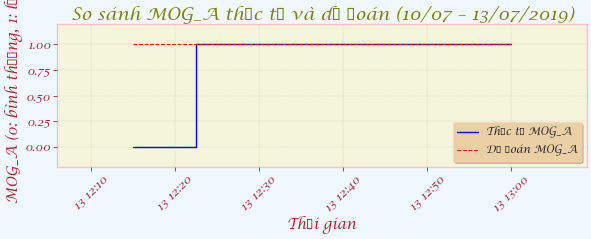

In [208]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.step(timestamps_test, y_test_seq, label='Thực tế MOG_A', color='blue', linewidth=2, where='mid')
plt.step(timestamps_test, y_pred_class, label='Dự đoán MOG_A', color='red', linestyle='--', where='mid')
plt.title("So sánh MOG_A thực tế và dự đoán (10/07 – 13/07/2019)")
plt.xlabel("Thời gian")
plt.ylabel("MOG_A (0: bình thường, 1: lỗi)")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [212]:
print("timestamps_test:", timestamps_test.tolist())
print("y_test_seq:", y_test_seq.tolist())
print("y_pred_class:", y_pred_class.tolist())


timestamps_test: [Timestamp('2019-07-13 12:15:00'), Timestamp('2019-07-13 12:30:00'), Timestamp('2019-07-13 12:45:00'), Timestamp('2019-07-13 13:00:00')]
y_test_seq: [0.0, 1.0, 1.0, 1.0]
y_pred_class: [1, 1, 1, 1]


In [213]:
print(test_df[['DeviceTimeStamp', 'MOG_A']])


         DeviceTimeStamp  MOG_A
2575 2019-07-13 11:51:00    1.0
2576 2019-07-13 11:51:00    1.0
2577 2019-07-13 12:05:00    0.0
2578 2019-07-13 12:15:00    0.0
2579 2019-07-13 12:30:00    1.0
2580 2019-07-13 12:45:00    1.0
2581 2019-07-13 13:00:00    1.0
